# Построение модели по данным о ценах на дома

## Импорт пакетов
- `matplotlib.pyplot`, `pylab`, `seaborn` - рисование графиков
- `pandas` - работа с таблицами
- `numpy` - работа с матрицами
- `linear_model` - модель линейной регрессии

In [1]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

import pandas as pd

import numpy as np

# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

import xgboost as xg

from sklearn.model_selection import train_test_split

%matplotlib inline

## Анализ данных

`kc_house_data.csv`

[Dataset source](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)

### Загрузка данных

In [2]:
df = pd.read_csv("./../../../data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Простая линейная регрессия

In [4]:
# разделить независимую и зависимую переменные / train и test
Y = df["price"].copy()
X = df[["bathrooms"]].copy()
# X = df.drop(['id','date', 'price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42
)

In [5]:
# создать объект линейной регрессии
simple_regr = linear_model.LinearRegression()

# обучить модель
simple_regr.fit(X_train, y_train)

# вывести результаты обучения
print("Coefficients: ", simple_regr.coef_)
print("Intercept: ", simple_regr.intercept_)

Coefficients:  [246883.42932569]
Intercept:  16068.776681519521


Text(0, 0.5, 'price')

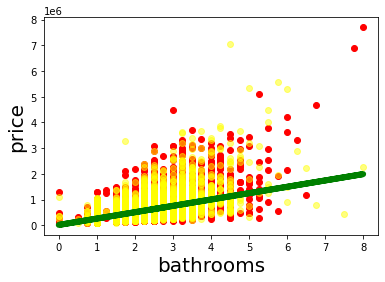

In [6]:
plt.scatter(X_train, y_train, color="red")
plt.scatter(X_test, y_test, color="yellow", alpha=0.5)

plt.plot(
    X_train, simple_regr.coef_[0] * X_train + simple_regr.intercept_, "-g", linewidth=6
)
plt.xlabel("bathrooms", fontsize=20)
plt.ylabel("price", fontsize=20)

In [7]:
# использовать обученную модель для предсказания на test выборке
y_predicted = simple_regr.predict(X_test)

# вывести результаты оценки предсказания
print(f"R2: {r2_score(y_test, y_predicted)}")
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.2666833159285342
MSE: 109800514141.87018
MAE: 331361.6063183395


## Полиномиальная регрессия (квадратичная) 2D

Coefficients:  [      0.         -200582.62134262   97645.53838961]
Intercept:  468297.3765696426
R2: 0.3049406502587434
MSE: 104072190935.26903
MAE: 322602.2178089745


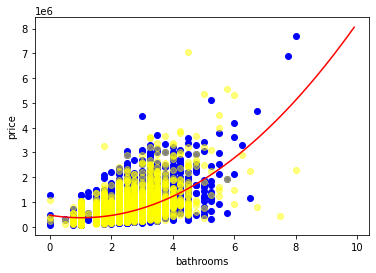

In [8]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_poly, y_train)

# The coefficients
print("Coefficients: ", poly_regr.coef_)
print("Intercept: ", poly_regr.intercept_)

plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test, color="yellow", alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = (
    poly_regr.intercept_
    + poly_regr.coef_[1] * XX
    + poly_regr.coef_[2] * np.power(XX, 2)
)
plt.plot(XX, yy, "-r")
plt.xlabel("bathrooms")
plt.ylabel("price")

X_test_poly = poly.fit_transform(X_test)
y_predicted = poly_regr.predict(X_test_poly)

# вывести результаты оценки предсказания
print(f"R2: {r2_score(y_test, y_predicted)}")
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

## Полиномиальная регрессия (кубическая) 2D

Coefficients:  [    0.         42952.31759299  -270.5826975  11377.63552076]
Intercept:  296303.80308689346
R2: 0.3049406502587434
MSE: 104072190935.26903
MAE: 322602.2178089745


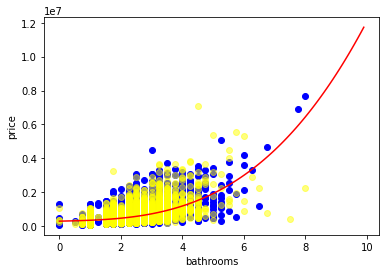

In [9]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
cubic_regr = linear_model.LinearRegression()
y3_train = cubic_regr.fit(X_train_poly3, y_train)

# The coefficients
print("Coefficients: ", cubic_regr.coef_)
print("Intercept: ", cubic_regr.intercept_)

plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test, color="yellow", alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = (
    cubic_regr.intercept_
    + cubic_regr.coef_[1] * XX
    + cubic_regr.coef_[2] * np.power(XX, 2)
    + cubic_regr.coef_[3] * np.power(XX, 3)
)
plt.plot(XX, yy, "-r")
plt.xlabel("bathrooms")
plt.ylabel("price")

test_x_poly3 = poly3.fit_transform(X_test)
y3_predicted = cubic_regr.predict(test_x_poly3)

# вывести результаты оценки предсказания
print(f"R2: {r2_score(y_test, y_predicted)}")
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

## Множественная линейная регрессия (2D)

In [10]:
# разделить независимую и зависимую переменные / train и test
from sklearn.model_selection import train_test_split

Y = df["price"].copy()
X = df[["bathrooms", "sqft_living15"]].copy()
# X = df.drop(['id','date', 'price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42
)

In [11]:
# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# обучить модель
multiple_regr.fit(X_train, y_train)

# вывести результаты обучения
print("Coefficients: ", multiple_regr.coef_)
print("Intercept: ", multiple_regr.intercept_)

Coefficients:  [137572.73251559    217.98271796]
Intercept:  -185302.34386722464


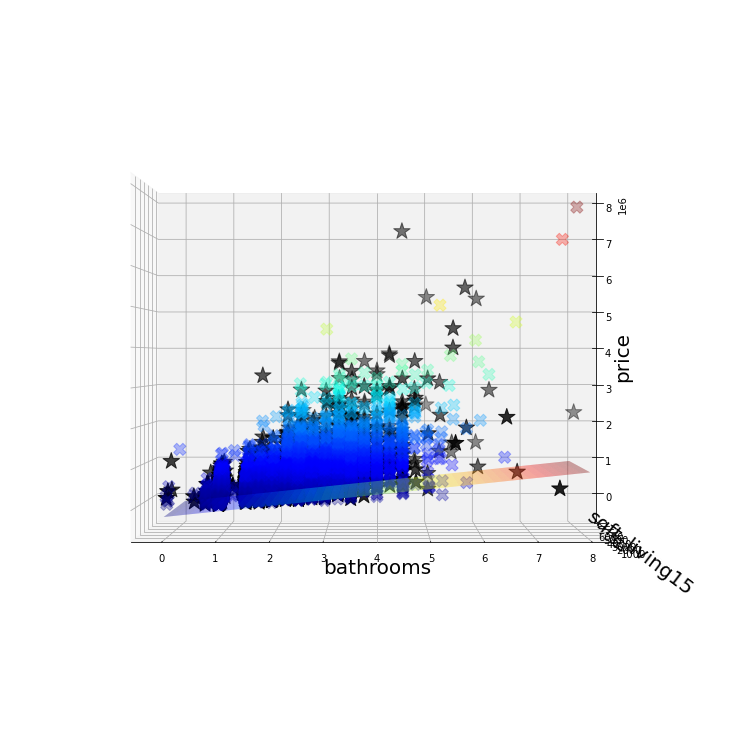

In [12]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

# Creating figure

fig = plt.figure(figsize=(15, 10))

ax = Axes3D(fig, azim=-90, elev=0)

ax.scatter3D(
    X_test.bathrooms,
    X_test.sqft_living15,
    y_test,
    marker="*",
    color="black",
    s=300,
    facecolor="black",
)

ax.scatter3D(
    X_train.bathrooms,
    X_train.sqft_living15,
    y_train,
    c=y_train,
    marker="X",
    cmap="jet",  # https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
    s=150,
    alpha=0.3,
    facecolor="black",
)
ax.set_xlabel("bathrooms", fontsize=20)
ax.set_ylabel("sqft_living15", fontsize=20)
ax.set_zlabel("price", fontsize=20)

xspan = np.linspace(X_train.bathrooms.min(), X_train.bathrooms.max())
yspan = np.linspace(X_train.sqft_living15.min(), X_train.sqft_living15.max())
xspan, yspan = np.meshgrid(xspan, yspan)

Z = multiple_regr.intercept_ + multiple_regr.coef_[0] * xspan
+multiple_regr.coef_[1] * yspan

surf = ax.plot_surface(xspan, yspan, Z, cmap="jet", alpha=0.4, linewidth=0)

In [13]:
# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(X_test)

# вывести результаты оценки предсказания
print(f"R2: {r2_score(y_test, y_predicted)}")
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.3926722388919476
MSE: 90936019690.77286
MAE: 301555.9976037168


## Множественная линейная регрессия (N-D)

In [14]:
# выбрать даннные для обучения / предсказания
Y = df["price"].copy()
X = df[["bathrooms", "grade", "condition", "yr_built", "sqft_living15"]].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42
)

In [15]:
# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# обучить модель
multiple_regr.fit(X_train, y_train)

# вывести результаты обучения
print("Coefficients: ", multiple_regr.coef_)
print("Intercept: ", multiple_regr.intercept_)

# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(X_test)

# вывести результаты оценки предсказания
print(f"R2: {r2_score(y_test, y_predicted)}")
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

Coefficients:  [ 1.20556172e+05  1.63952411e+05  1.57464900e+04 -4.43578683e+03
  9.35879178e+01]
Intercept:  7532247.261800168
R2: 0.568531383117334
MSE: 64604388525.2464
MAE: 254173.93360698182


## Полиномиальная регрессия (квадратичная) N-D

In [16]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_poly, y_train)

# The coefficients
print("Coefficients: ", poly_regr.coef_)
print("Intercept: ", poly_regr.intercept_)

X_test_poly = poly.fit_transform(X_test)
y_predicted = poly_regr.predict(X_test_poly)

# вывести результаты оценки предсказания
print(f"R2: {r2_score(y_test, y_predicted)}")
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

Coefficients:  [ 0.00000000e+00 -2.93086888e+05  1.31420448e+06  5.17115243e+05
 -9.30361941e+04  4.39921268e+03  3.20743915e+04  4.76002244e+04
 -1.69411891e+03 -6.43937844e+01  2.66354950e+00  2.12245420e+04
 -5.07766391e+03 -7.71509014e+02 -3.35432214e+01  2.96811184e+03
 -2.95275123e+02  5.79688267e+01  2.56915566e+01 -2.23920092e+00
  4.31201538e-02]
Intercept:  84637478.03759268
R2: 0.6490078976269045
MSE: 52554529492.39864
MAE: 229247.7469734406


## Полиномиальная регрессия (4-я степень) N-D

In [17]:
poly3 = PolynomialFeatures(degree=4)
X_train_poly3 = poly3.fit_transform(X_train)
cubic_regr = linear_model.LinearRegression()
cubic_regr.fit(X_train_poly3, y_train)

# The coefficients
print("Coefficients: ", cubic_regr.coef_)
print("Intercept: ", cubic_regr.intercept_)

test_x_poly = poly3.fit_transform(X_test)
y_predicted = cubic_regr.predict(test_x_poly)

# вывести результаты оценки предсказания
print(f"R2: {r2_score(y_test, y_predicted)}")
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

Coefficients:  [-1.86041572e-01  1.91874646e+03 -7.67532326e+01 -3.90099306e+01
  2.58513466e+02 -5.45860156e+03 -2.11663073e+00 -1.61803521e+02
 -1.77032583e+02 -9.84368113e+04  8.30683479e+04 -1.74250006e+02
  2.29720226e+01 -7.96063146e+04  1.28811662e+05  4.33466302e+02
  1.19901054e+05 -1.34631834e+05  3.76009948e+03 -5.67918810e+01
 -1.68560421e+02 -4.07217640e+03 -1.21314762e+04  6.91979835e+02
 -6.54126286e+02  5.88912443e+02 -3.64881675e+04 -2.41944263e+02
 -8.10657063e+02  2.13106332e+02  8.30082616e+02 -1.76403294e+03
  1.63701552e+03  1.08503583e+02 -8.97962591e+01  3.63981771e-01
 -1.00682889e+05 -2.62565086e+03  1.59687612e+03 -5.60463196e+02
  4.00371238e+02  2.70137007e+03 -3.16814501e+03  6.93999123e+01
 -1.20909938e+02  2.46791517e-01  2.09496255e+03 -1.77487535e+03
  1.82186687e+03 -1.22279564e+02  1.36829702e+02  2.38057494e+00
 -2.58187506e+00  4.75905297e-02  1.67379363e-01 -2.97265340e-04
  2.51555089e+03 -1.20886167e+04  1.11409905e+04 -1.61030291e+01
  3.110941

## XGBoost for Regression

In [18]:
# разделить независимую и зависимую переменные / train и test
Y = df["price"].copy()
X = df.drop(["id", "date", "price"], axis=1)  # использовать все остальные колонки
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42
)

In [19]:
xgb_r = xg.XGBRegressor(n_estimators=800, learning_rate=0.05, max_depth=5)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
y_predicted = xgb_r.predict(X_test)

# вывести результаты оценки предсказания
print(f"R2: {r2_score(y_test, y_predicted)}")
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.8842485394214923
MSE: 17331625149.48855
MAE: 131649.63026719273
